In [165]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
# Load the data
data = pd.read_csv("/Users/shawnyang/Desktop/UofT/MIE1624/Assi1/clean_kaggle_data.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

,No,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
1,8,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,...,"Reddit (r/machinelearning, etc)",NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
2,9,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,14,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,17,679,40-44,Man,United States of America,No,Coursera,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [167]:
# display the descriptive statistics of the dataset
print(data.describe())
# display the data types of the dataset
data.info()
# display the number of rows and columns of the dataset
data.shape

                 No  Duration (in seconds)             Q29
count   8136.000000           8.136000e+03     8136.000000
mean   11952.636799           1.063510e+04    63747.726155
std     6906.937249           1.193662e+05   116674.822709
min        4.000000           1.340000e+02     1000.000000
25%     5952.500000           4.480000e+02     4000.000000
50%    11909.500000           6.340000e+02    25000.000000
75%    17873.250000           9.880000e+02    80000.000000
max    23996.000000           2.512765e+06  1000000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Columns: 297 entries, No to Q44_12
dtypes: int64(3), object(294)
memory usage: 18.4+ MB


(8136, 297)

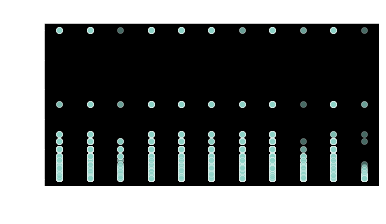

In [168]:
# display the distribution between age and salary
plt.figure(figsize=(6, 3))
sns.scatterplot(x=data['Q2'], y=data['Q29'], alpha=0.5)
plt.title("Age vs. Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

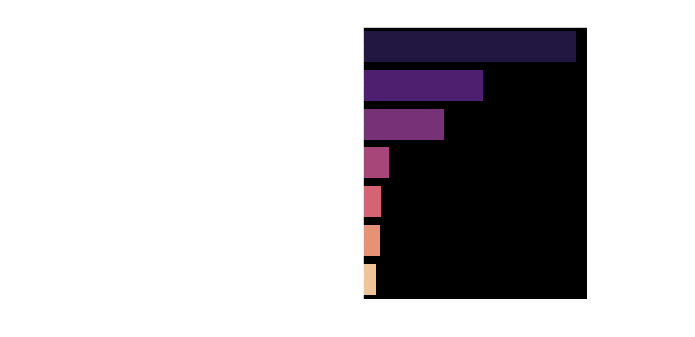

In [169]:
# Plotting the distribution of respondents by education level
plt.figure(figsize=(4, 5))
education_counts = data['Q8'].value_counts()
sns.barplot(x=education_counts.values, y=education_counts.index, palette="magma")
plt.title("Distribution of Respondents by Education Level", fontsize=18)
plt.xlabel("Number of Respondents", fontsize=10)
plt.ylabel("Education Level", fontsize=10)
plt.show()

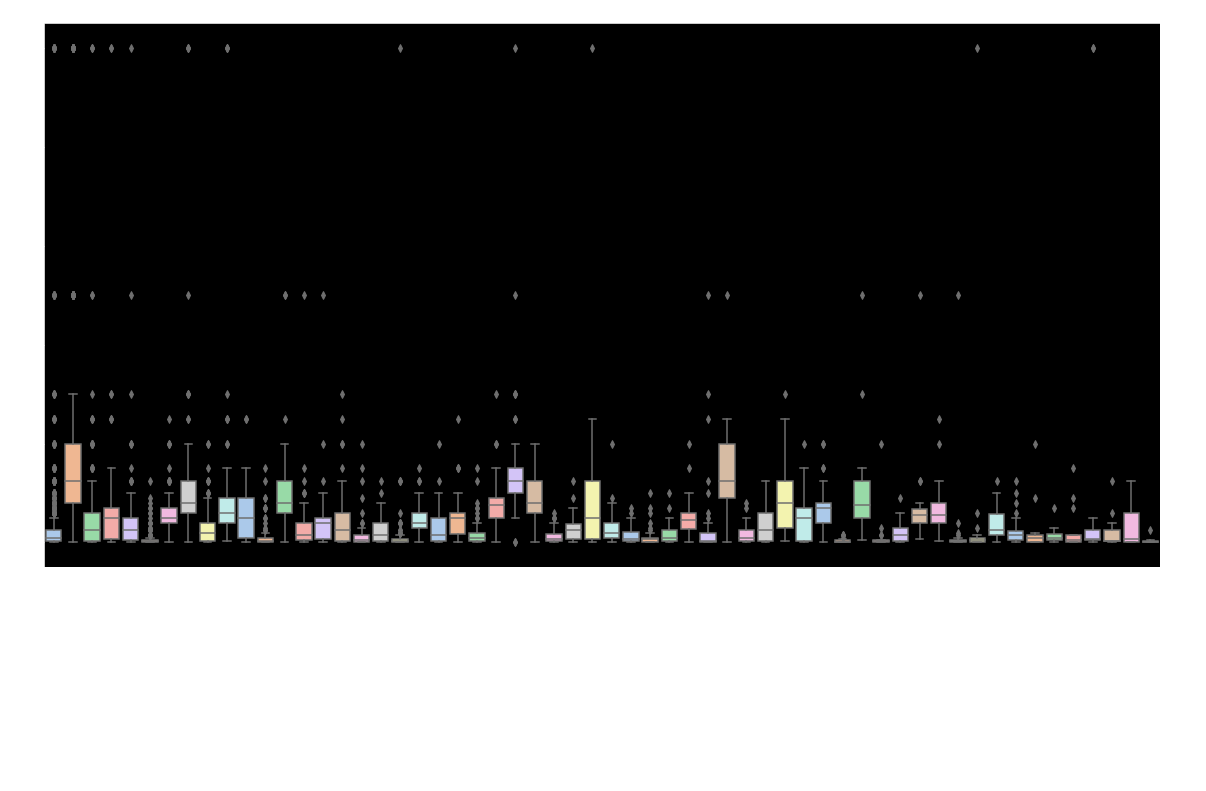

In [170]:
# Boxplot of salary by education level
plt.figure(figsize=(20, 10))
sns.boxplot(x=data['Q4'], y=data['Q29'], palette="pastel", order=data['Q4'].value_counts().index)
plt.title("Salary Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

In [171]:
# Filter data for 'Man' and 'Woman' gender categories
filtered_data = data[data['Q3'].isin(['Man', 'Woman'])]

# Drop rows with missing salary data
filtered_data = filtered_data.dropna(subset=['Q29'])
filtered_data.describe()

,No,Duration (in seconds),Q29
count,8017.000000,8.017000e+03,8017.000000
mean,11943.737059,1.063872e+04,63323.936635
std,6910.445916,1.197050e+05,116304.459877
min,4.000000,1.340000e+02,1000.000000
25%,5942.000000,4.490000e+02,4000.000000
50%,11899.000000,6.350000e+02,25000.000000
75%,17870.000000,9.880000e+02,80000.000000
max,23996.000000,2.512765e+06,1000000.000000


In [172]:
# Filter data for 'Man' and 'Woman' gender categories
filtered_data = data[data['Q3'].isin(['Man', 'Woman'])]

# Drop rows with missing salary data
filtered_data = filtered_data.dropna(subset=['Q29'])

# Filter out outliers
lower_threshold = filtered_data['Q29'].quantile(0.01)
upper_threshold = filtered_data['Q29'].quantile(0.99)
filtered_data_no_outliers = filtered_data[(filtered_data['Q29'] >= lower_threshold) & (filtered_data['Q29'] <= upper_threshold)]
# Display the descriptive statistics of the filtered dataset
man_stats = filtered_data_no_outliers[filtered_data_no_outliers['Q3'] == 'Man']['Q29'].describe()
woman_stats = filtered_data_no_outliers[filtered_data_no_outliers['Q3'] == 'Woman']['Q29'].describe()
# Make a title for the descriptive statistics table
man_stats_filtered_title = "Descriptive Statistics for Men's Salaries"
woman_stats_filtered_title = "Descriptive Statistics for Women's Salaries"
man_stats_filtered_title, man_stats, woman_stats_filtered_title, woman_stats


("Descriptive Statistics for Men's Salaries",
 count      6572.000000
 mean      57434.646987
 std       77897.512146
 min        1000.000000
 25%        5000.000000
 50%       25000.000000
 75%       80000.000000
 max      500000.000000
 Name: Q29, dtype: float64,
 "Descriptive Statistics for Women's Salaries",
 count      1375.000000
 mean      43787.272727
 std       68191.308867
 min        1000.000000
 25%        2000.000000
 50%       15000.000000
 75%       60000.000000
 max      500000.000000
 Name: Q29, dtype: float64)

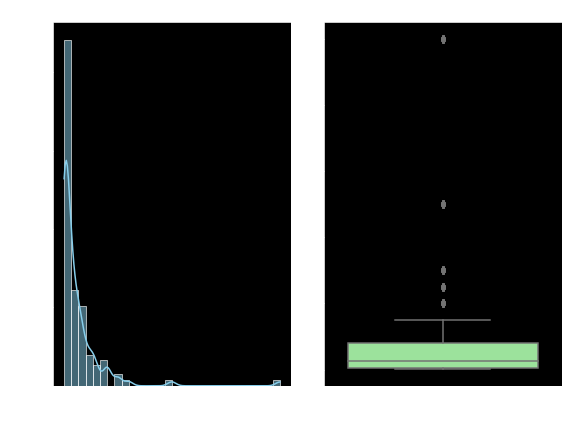

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of salaries in the filtered data using a histogram and a boxplot
plt.figure(figsize=(8, 6))

# Histogram of salaries
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['Q29'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Salaries (Filtered Data)")
plt.xlabel("Salary")
plt.ylabel("Frequency")

# Boxplot of salaries
plt.subplot(1, 2, 2)
sns.boxplot(filtered_data['Q29'], color='lightgreen')
plt.title("Boxplot of Salaries (Filtered Data)")
plt.xlabel("Salary")
plt.tight_layout()
plt.show()

In [174]:
# Checking normality using the Shapiro-Wilk test
man_salaries = filtered_data[filtered_data['Q3'] == 'Man']['Q29']
woman_salaries = filtered_data[filtered_data['Q3'] == 'Woman']['Q29']
shapiro_test_men = shapiro(man_salaries)
shapiro_test_women = shapiro(woman_salaries)

# Display the results of the Shapiro-Wilk test
print("P-value for men:", shapiro_test_men[1])
print("P-value for women:", shapiro_test_women[1])


P-value for men: 0.0
P-value for women: 0.0


/Applications/Anaconda/anaconda3/envs/pytorch/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [175]:
#perform a two-sample t-test with a 0.05 threshold

t_stat, p_value = ttest_ind(man_salaries, woman_salaries)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 5.17081997104188, P-value: 2.387041366669271e-07


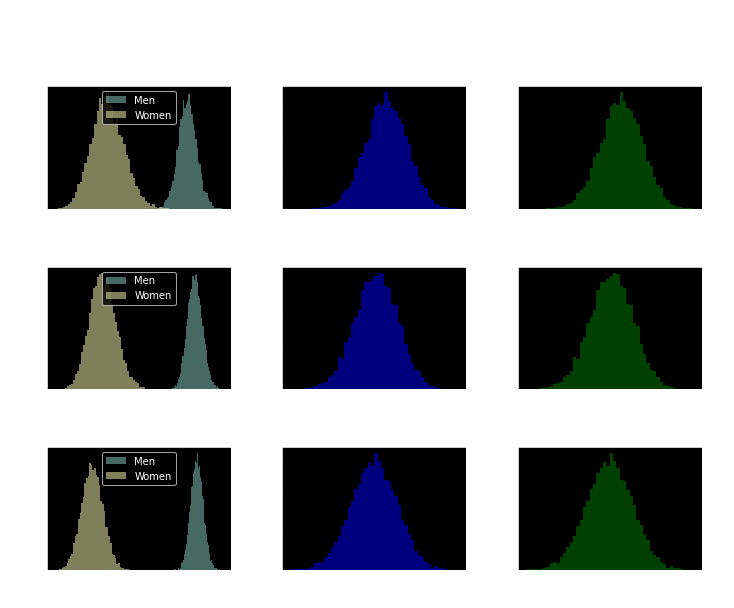

{0.5: (17814.034630965245, 4221.931023513208),
 1: (17744.03543188503, 2975.96967708132),
 2: (17741.572276330844, 2085.500784052291)}

In [176]:
# Values of n to experiment with
n_values = [0.5, 1, 2]
# Results storage
results = {}
# Number of bootstrap replications
n_iterations = 10000

# Modify the bootstrap_sample function to ensure the size is an integer
def bootstrap_sample(data, n=1):
    """Generate bootstrap samples from the data."""
    return np.random.choice(data, size=int(len(data)*n), replace=True)

# Re-perform bootstrap analysis for each value of n
for n in n_values:
    # Bootstrap the salary data for men and women separately
    bootstrapped_men_means = [np.mean(bootstrap_sample(man_salaries, n=n)) for _ in range(n_iterations)]
    bootstrapped_women_means = [np.mean(bootstrap_sample(woman_salaries, n=n)) for _ in range(n_iterations)]
    
    # Differences and normalized differences
    differences = np.array(bootstrapped_men_means) - np.array(bootstrapped_women_means)
    normalized_differences = differences / np.std(differences)
    
    # Storing results
    results[n] = {
        "bootstrapped_men_means": bootstrapped_men_means,
        "bootstrapped_women_means": bootstrapped_women_means,
        "differences": differences,
        "normalized_differences": normalized_differences,
        "mean_difference": np.mean(differences),
        "std_difference": np.std(differences)
    }
# Plotting
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle('Bootstrapping with Different Sample Sizes (n)', y=1.05)

for idx, n in enumerate(n_values):
    # Bootstrapped distributions
    axs[idx, 0].hist(results[n]["bootstrapped_men_means"], bins=50, alpha=0.5, label='Men')
    axs[idx, 0].hist(results[n]["bootstrapped_women_means"], bins=50, alpha=0.5, label='Women')
    axs[idx, 0].set_xlabel('Mean Salary')
    axs[idx, 0].set_ylabel('Frequency')
    axs[idx, 0].legend()
    axs[idx, 0].set_title(f'n={n}: Distributions of Mean Salaries')
    
    # Distribution of differences
    axs[idx, 1].hist(results[n]["differences"], bins=50, alpha=0.5, color='blue')
    axs[idx, 1].set_xlabel('Difference in Mean Salary')
    axs[idx, 1].set_title(f'n={n}: Difference in Means')
    
    # Normalized distribution of differences
    axs[idx, 2].hist(results[n]["normalized_differences"], bins=50, alpha=0.5, color='green')
    axs[idx, 2].set_xlabel('Normalized Difference in Mean Salary')
    axs[idx, 2].set_title(f'n={n}: Normalized Difference in Means')

plt.tight_layout()
plt.show()

# Return mean and std differences for each value of n
mean_std_results = {n: (results[n]["mean_difference"], results[n]["std_difference"]) for n in n_values}
mean_std_results


In [177]:
# Conduct the t-test on bootstrapped means
t_stat_bootstrap, p_value_bootstrap = ttest_ind(bootstrapped_men_means, bootstrapped_women_means)

print(f"Bootstrap T-statistic: {t_stat_bootstrap}, Bootstrap P-value: {p_value_bootstrap}")

Bootstrap T-statistic: 844.4941498911163, Bootstrap P-value: 0.0


In [178]:
# Filter data for the three education levels
education_levels = ['Bachelor’s degree', 'Master’s degree', 'Doctoral degree']
education_filtered_data = data[data['Q8'].isin(education_levels)]

# Drop rows with missing salary data
education_filtered_data = education_filtered_data.dropna(subset=['Q29'])

# Define thresholds for outliers
lower_threshold_education = education_filtered_data['Q29'].quantile(0.01)
upper_threshold_education = education_filtered_data['Q29'].quantile(0.99)
education_filtered_data_no_outliers = education_filtered_data[
    (education_filtered_data['Q29'] >= lower_threshold_education) & 
    (education_filtered_data['Q29'] <= upper_threshold_education)]

# Compute descriptive statistics for each education level
bachelors_stats = education_filtered_data_no_outliers[
    education_filtered_data_no_outliers['Q8'] == 'Bachelor’s degree']['Q29'].describe()

masters_stats = education_filtered_data_no_outliers[
    education_filtered_data_no_outliers['Q8'] == 'Master’s degree']['Q29'].describe()

doctoral_stats = education_filtered_data_no_outliers[
    education_filtered_data_no_outliers['Q8'] == 'Doctoral degree']['Q29'].describe()

# Make a title for the descriptive statistics table
bachelors_stats_title = "Descriptive Statistics for bachelors Salaries"
masters_stats_title = "Descriptive Statistics for masters Salaries"
doctoral_stats_title = "Descriptive Statistics for doctoral Salaries"
bachelors_stats_title, bachelors_stats, masters_stats_title, masters_stats, doctoral_stats_title, doctoral_stats

('Descriptive Statistics for bachelors Salaries',
 count      1986.000000
 mean      44803.373615
 std       69756.712767
 min        1000.000000
 25%        3000.000000
 50%       15000.000000
 75%       60000.000000
 max      500000.000000
 Name: Q29, dtype: float64,
 'Descriptive Statistics for masters Salaries',
 count      3543.000000
 mean      59290.714084
 std       77138.686299
 min        1000.000000
 25%        7500.000000
 50%       30000.000000
 75%       80000.000000
 max      500000.000000
 Name: Q29, dtype: float64,
 'Descriptive Statistics for doctoral Salaries',
 count      1334.000000
 mean      74081.334333
 std       89341.382011
 min        1000.000000
 25%        7500.000000
 50%       50000.000000
 75%      100000.000000
 max      500000.000000
 Name: Q29, dtype: float64)

In [179]:
# Extracting the salary data for the three groups
bachelors_salaries = education_filtered_data_no_outliers[
    education_filtered_data_no_outliers['Q8'] == 'Bachelor’s degree']['Q29']

masters_salaries = education_filtered_data_no_outliers[
    education_filtered_data_no_outliers['Q8'] == 'Master’s degree']['Q29']

doctoral_salaries = education_filtered_data_no_outliers[
    education_filtered_data_no_outliers['Q8'] == 'Doctoral degree']['Q29']

# Performing ANOVA
f_stat, p_value = f_oneway(bachelors_salaries, masters_salaries, doctoral_salaries)
f_stat, p_value

(57.76033835796154, 1.330070521311715e-25)

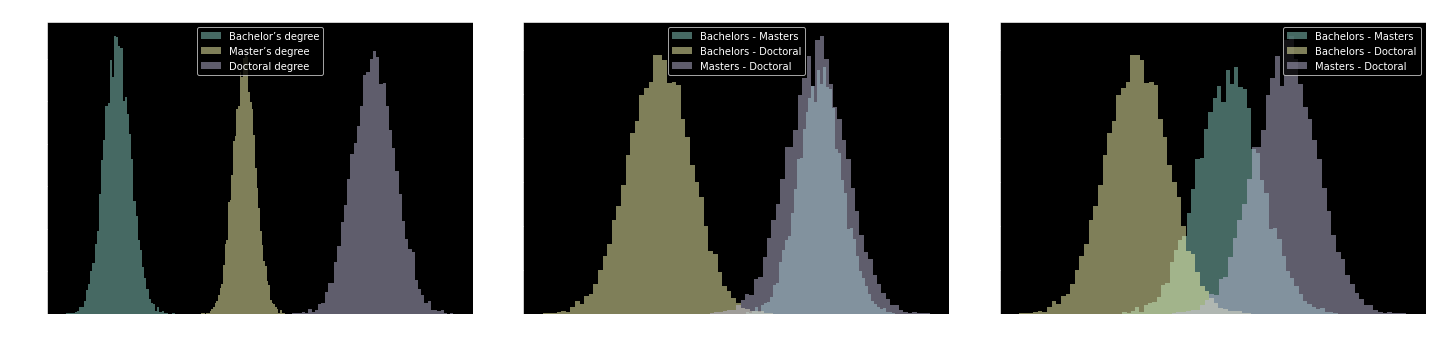

In [180]:
# Bootstrapping the salary data for each education level

# Number of bootstrap replications
n_iterations = 10000

# Bootstrapping the salary data for each educational level using the actual salary data (not the descriptive statistics)
bootstrapped_bachelors_means = [np.mean(bootstrap_sample(bachelors_salaries)) for _ in range(n_iterations)]
bootstrapped_masters_means = [np.mean(bootstrap_sample(masters_salaries)) for _ in range(n_iterations)]
bootstrapped_doctoral_means = [np.mean(bootstrap_sample(doctoral_salaries)) for _ in range(n_iterations)]

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Bootstrapped distributions
ax1.hist(bootstrapped_bachelors_means, bins=50, alpha=0.5, label='Bachelor’s degree')
ax1.hist(bootstrapped_masters_means, bins=50, alpha=0.5, label='Master’s degree')
ax1.hist(bootstrapped_doctoral_means, bins=50, alpha=0.5, label='Doctoral degree')
ax1.set_xlabel('Mean Salary')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.set_title('Bootstrapped Distributions of Mean Salaries by Education Level')

# Distribution of differences in means
differences_bach_mast = np.array(bootstrapped_bachelors_means) - np.array(bootstrapped_masters_means)
differences_bach_doc = np.array(bootstrapped_bachelors_means) - np.array(bootstrapped_doctoral_means)
differences_mast_doc = np.array(bootstrapped_masters_means) - np.array(bootstrapped_doctoral_means)
ax2.hist(differences_bach_mast, bins=50, alpha=0.5, label='Bachelors - Masters')
ax2.hist(differences_bach_doc, bins=50, alpha=0.5, label='Bachelors - Doctoral')
ax2.hist(differences_mast_doc, bins=50, alpha=0.5, label='Masters - Doctoral')
ax2.set_xlabel('Difference in Mean Salary')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.set_title('Distributions of Differences in Means by Education Level')

# Normalized distribution of differences in means
normalized_differences_bach_mast = differences_bach_mast / np.std(differences_bach_mast)
normalized_differences_bach_doc = differences_bach_doc / np.std(differences_bach_doc)
normalized_differences_mast_doc = differences_mast_doc / np.std(differences_mast_doc)
ax3.hist(normalized_differences_bach_mast, bins=50, alpha=0.5, label='Bachelors - Masters')
ax3.hist(normalized_differences_bach_doc, bins=50, alpha=0.5, label='Bachelors - Doctoral')
ax3.hist(normalized_differences_mast_doc, bins=50, alpha=0.5, label='Masters - Doctoral')
ax3.set_xlabel('Normalized Difference in Mean Salary')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.set_title('Normalized Distributions of Differences in Means by Education Level')

plt.tight_layout()
plt.show()


In [181]:
# Performing ANOVA on bootstrapped data
f_stat_bootstrapped, p_value_bootstrapped = f_oneway(bootstrapped_bachelors_means, bootstrapped_masters_means, bootstrapped_doctoral_means)
f_stat_bootstrapped, p_value_bootstrapped

(641664.040742093, 0.0)